[epoch 0 /200 ] loss: 0.026911438
[epoch 10 /200 ] loss: 0.0008644036
[epoch 20 /200 ] loss: 0.00029337796
[epoch 30 /200 ] loss: 0.000103234604
[epoch 40 /200 ] loss: 3.6911628e-05
[epoch 50 /200 ] loss: 1.3290256e-05
[epoch 60 /200 ] loss: 4.7996414e-06
[epoch 70 /200 ] loss: 1.7355509e-06
[epoch 80 /200 ] loss: 6.279153e-07
[epoch 90 /200 ] loss: 2.2722952e-07
[epoch 100 /200 ] loss: 8.224173e-08
[epoch 110 /200 ] loss: 2.9765392e-08
[epoch 120 /200 ] loss: 1.0774698e-08
[epoch 130 /200 ] loss: 3.900314e-09
[epoch 140 /200 ] loss: 1.4117605e-09
[epoch 150 /200 ] loss: 5.110303e-10
[epoch 160 /200 ] loss: 1.849811e-10
[epoch 170 /200 ] loss: 6.7023026e-11
[epoch 180 /200 ] loss: 2.416499e-11
[epoch 190 /200 ] loss: 8.822507e-12
[epoch 200 /200 ] loss: 3.1863223e-12
Result   W: [[0.10000433 0.20000456]]  b: [0.29999503]


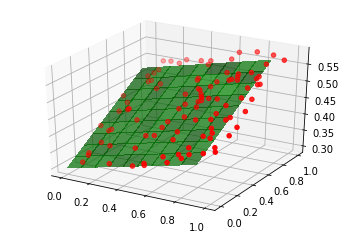

In [54]:
import tensorflow as tf
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


x_data = np.float32(np.random.rand(2,100))
# print(x_data)
y_data = np.dot([0.100,0.200],x_data) + 0.300
# print(x_data.shape,y_data.shape)
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data[0],x_data[1], y_data, c='r', marker='o')
# plt.show()

# 初始化线性模型
b = tf.Variable(tf.zeros([1]))
w = tf.Variable(tf.random_uniform([1,2],-1.0,1.0))
y = tf.matmul(w,x_data) + b

# 最小化方差
loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for step in range(0,201):
    sess.run(train)
    if step % 10 == 0:
        print ("[epoch",step,"/200 ] loss:",sess.run(loss))

print("Result   W:",sess.run(w)," b:",sess.run(b))
X = np.arange(0, 1, 0.1)
Y = np.arange(0, 1, 0.1)
X, Y = np.meshgrid(X, Y)


Z = sess.run(w)[0][0] * X + sess.run(w)[0][1]* Y + sess.run(b)[0]

# 这里注意设置一下透明度，要不然之前的散点就看不到了！
ax.plot_surface(X, Y, Z,color='g',linewidth=0, antialiased=False,alpha=0.7)

plt.show()